In [40]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../data/position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


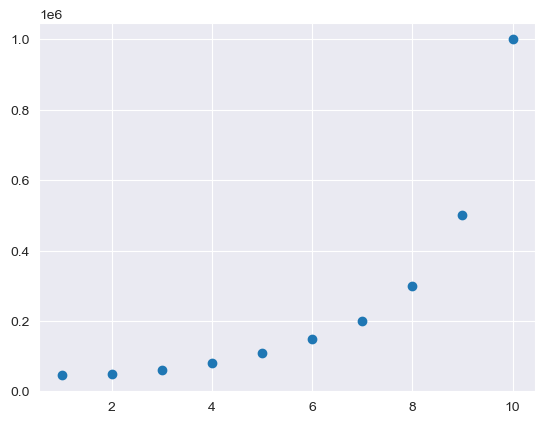

In [41]:
plt.scatter(df['Level'], df['Salary'])
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[['Level']],df[['Salary']], test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
lin_reg.predict([[10]])

/Users/mucham/opt/anaconda3/envs/statistics/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[626673.18982387]])

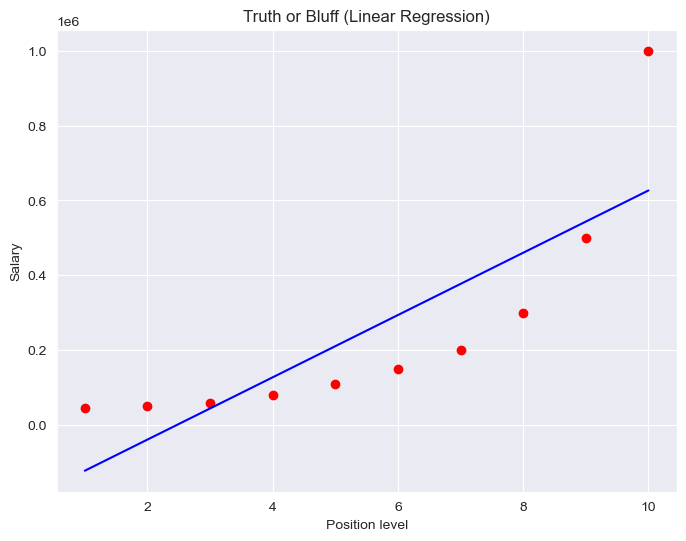

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(df[['Level']],df[['Salary']], color='red')
plt.plot(df[['Level']], lin_reg.predict(df[['Level']]), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [56]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(df[['Level']])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, df[['Salary']])

LinearRegression()

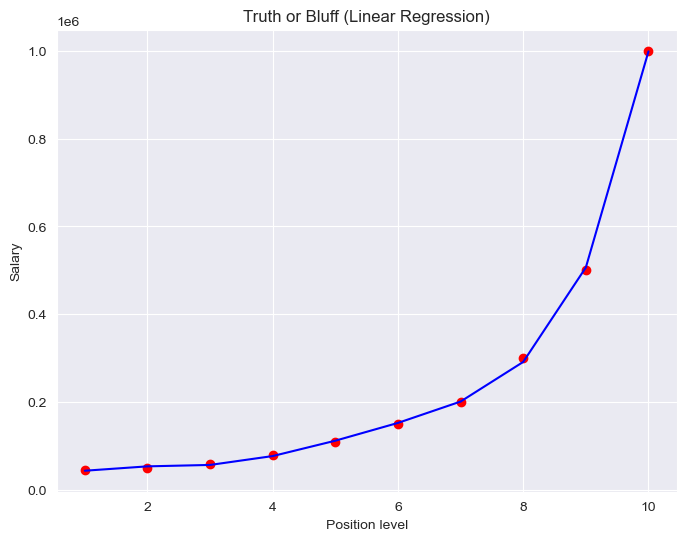

In [57]:
# Visualizing the Polymonial Regression results
plt.figure(figsize=(8,6))
plt.scatter(df[['Level']], df[['Salary']], color='red')
plt.plot(df[['Level']], pol_reg.predict(poly_reg.fit_transform(df[['Level']])), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [52]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([[129243.47651003]])

Root Mean Squared Error (RMSE): 4047.503475265604


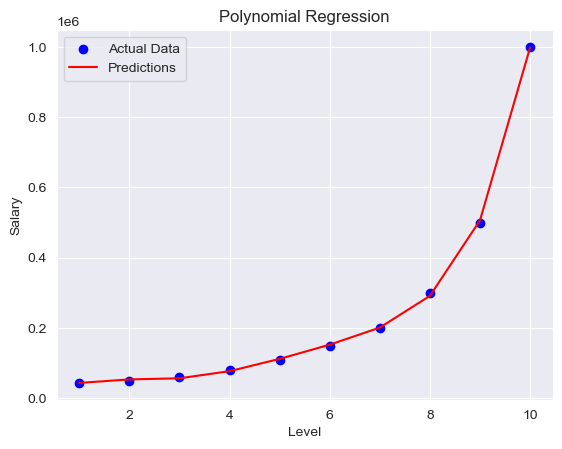

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['Salary'], pol_reg.predict(poly_reg.fit_transform(df[['Level']]))))
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the predictions
import matplotlib.pyplot as plt

plt.scatter(df['Level'], df['Salary'], color='blue', label='Actual Data')
plt.plot(df['Level'], pol_reg.predict(poly_reg.fit_transform(df[['Level']])), color='red', label='Predictions')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.title('Polynomial Regression')
plt.show()